In [1]:
import json
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [26]:
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
def savefig(fig, filename):
    cmd = 'convert {} -trim {}'.format(filename, filename)
    fig.savefig(filename, bbox_inches='tight', dpi=300)
    os.system(cmd)

In [4]:
with open('fractional_coat_samples_fits.json', 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)

n_1 = df.n_1
a_1 = df.a_1*1e3

delta_a = 2e3*(df['a_p*1'] - df['a_p*0'])
delta_n = 1e3*(df['n_p*1'] - df['n_p*0'])

In [5]:
n_m = 1.340

def LL(n): #Lorentz-Lorenz function
    numer = n**2 - n_m**2
    denom = n**2 + 2*n_m**2
    return numer/denom

In [6]:
Ln_1 = LL(1.6)

f = LL(n_1)/Ln_1
f_ordered = np.sort(f)
prediction1 = 10*np.sqrt(f_ordered)
prediction2 = 20*f_ordered

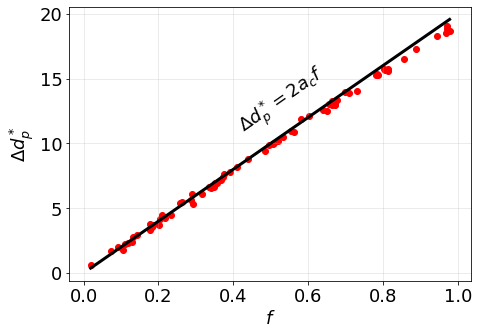

In [33]:
fig, ax = plt.subplots(figsize=(7,5))
#ax.plot(f_ordered, prediction1, c='r', label='prediction: $\delta \sqrt{f}$')
ax.plot(f_ordered, prediction2, c='k', linewidth=3)
ax.scatter(f, delta_a, c='r')
ax.set_xlabel('$f$')
ax.set_ylabel('$\Delta d_p^*$')
ax.text(0.4, 11, r'$\Delta d_p^* = 2 a_c f$', rotation=35)
ax.grid(alpha=0.3)
fig.tight_layout()
fig.savefig('coating_fraction_fits.png')